# Predicting sales price of Bulldozers usin Regression

## 1. Problem Definition

> Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.

## 2. Data

The data is downloaded from Kaggle blue book bulldozer competition.

There are three main datasets:
    
  * Train.csv is the training set, which contains data through the end of 2011.
  * Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012
    You make predictions on this set throughout the majority of the competition. 
    Your score on this set is used to create the public leaderboard.
  * Test.csv is the test set, which won't be released until the last week of the competition. 
    It contains data from May 1, 2012 - November 2012. 
    Your score on the test set determines your final rank for the competition.

## 3. Evaluation

 The evaluation metric for this competition is RMSLE(root mean squared log error) between actual and predicted prices.
 for more info: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation
  goal: minimize RMSLE

## 4. Features

kaggle provided data dictionary.
for info: https://www.kaggle.com/c/bluebook-for-bulldozers/data

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import train and valid sets

data = pd.read_csv("data/TrainAndValid.csv"
                  ,low_memory=False)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

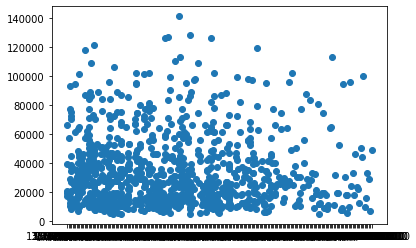

In [6]:
fig , ax = plt.subplots()
ax.scatter(data["saledate"][:1000],data["SalePrice"][:1000]);

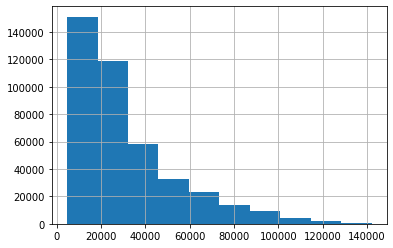

In [7]:
data["SalePrice"].hist()

In [8]:
data["saledate"].dtype

dtype('O')

## Parsing Dates

Since saledate is a object, to convert it to datetime use `parse_dates`

In [9]:
data = pd.read_csv("data/TrainAndValid.csv"
                  ,low_memory=False
                  ,parse_dates=["saledate"])

In [10]:
data.saledate.dtype

dtype('<M8[ns]')

In [12]:
data["saledate"][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

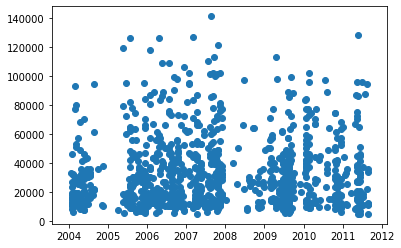

In [13]:
fig , ax = plt.subplots()
ax.scatter(data["saledate"][:1000],data["SalePrice"][:1000]);

In [14]:
data.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [15]:
data["saledate"].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### SORT DATAFRAME BY SALEDATE

In [16]:
data.sort_values(by=["saledate"],inplace=True,ascending=True)

In [17]:
data["saledate"].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### make copy of orignal dataframe

In [18]:
#copy

data_tmp = data.copy()

In [19]:
data_tmp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### ADD datetime parameters for `saledate` column

In [20]:
data_tmp["saleYear"] = data_tmp["saledate"].dt.year

In [21]:
data_tmp["saleYear"]

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [22]:
data_tmp["saleMonth"] = data_tmp["saledate"].dt.month

In [23]:
data_tmp["saleMonth"]

205615    1
274835    1
141296    1
212552    1
62755     1
         ..
410879    4
412476    4
411927    4
407124    4
409203    4
Name: saleMonth, Length: 412698, dtype: int64

In [24]:
data_tmp["saleDay"] = data_tmp["saledate"].dt.day
data_tmp["saleDayOfWeek"] = data_tmp["saledate"].dt.dayofweek
data_tmp["saleDayOfYear"] = data_tmp["saledate"].dt.dayofyear

In [25]:
data_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [26]:
#no need of saledate column

data_tmp.drop("saledate",axis=1,inplace=True)

In [27]:
data_tmp["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Convert strings to categories

In [28]:
data_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [29]:
pd.api.types.is_string_dtype(data_tmp["UsageBand"])

True

In [30]:
data_tmp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype

In [31]:
# find columns which are string types
cat_features = []
for label, content in data_tmp.items():
    if(pd.api.types.is_string_dtype(content)):
        cat_features.append(label)
    

In [32]:
cat_features

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [33]:
len(data_tmp.columns)

57

In [34]:
data_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [35]:
for label,content in data_tmp.items():
    if pd.api.types.is_string_dtype(content):
        data_tmp[label] = content.astype("category").cat.as_ordered()

In [36]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [37]:
data_tmp["state"].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [38]:
### save preprocessed data

data_tmp.to_csv("data/TrainAndValid_prep.csv"
               ,index=False)

In [39]:
#load data

data_tmp2 = pd.read_csv("data/TrainAndValid_prep.csv"
                       ,low_memory=False)
data_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [38]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [39]:
data_tmp.isna().sum()/len(data_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### fill missing values for Numeric columns

In [40]:
#list of numeric features with missing values
for label , content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [41]:
for label,content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            #add binary column to track records with missing values
            data_tmp[label+"_is_missing"] = pd.isna(content)
            #fill missing values with median
            data_tmp[label] = content.fillna(content.median())

In [42]:
data_tmp["auctioneerID_is_missing"].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

### Fill missing categorical features

In [43]:
# finding features that are not numerical
for label,content in data_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [44]:
# turn categorical features into numeric and fill missing values
for label,content in data_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        data_tmp[label+"_is_missing"] = pd.isna(content)
        data_tmp[label] = content.cat.codes+1
        

In [45]:
data_tmp["UsageBand"].value_counts()

0    339028
3     35832
2     25311
1     12527
Name: UsageBand, dtype: int64

In [46]:
data_tmp["UsageBand"].value_counts()

0    339028
3     35832
2     25311
1     12527
Name: UsageBand, dtype: int64

In [47]:
# check if any categorical feature left
for label, content in data_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [59]:
len(data_tmp)

412698

In [54]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [56]:
data_tmp["saleYear"].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

### Splitting data into train and valid sets based on saleYear

In [58]:
data_val = data_tmp[data_tmp["saleYear"] == 2012]
data_val

data_train = data_tmp[data_tmp["saleYear"] != 2012]
data_train

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393098,6260687,29000.0,1074871,4331,149,2.0,1000,0.0,0,3137,...,True,True,True,True,True,True,True,True,False,False
400217,6312170,11000.0,1812622,9580,149,2.0,2005,0.0,0,4514,...,True,True,True,True,True,True,True,True,True,True
400302,6312727,11000.0,1811599,9580,149,2.0,2005,0.0,0,4514,...,True,True,True,True,True,True,True,True,True,True
400393,6315051,18000.0,1858173,17432,149,2.0,2004,0.0,0,3389,...,True,True,True,True,True,True,True,True,True,True


In [60]:
len(data_train),len(data_val)

(401125, 11573)

In [61]:
# splitting data into features and labels

X_train , y_train = data_train.drop("SalePrice",axis=1),data_train["SalePrice"]
X_val , y_val = data_val.drop("SalePrice",axis=1),data_val["SalePrice"]

In [63]:
X_train.shape , y_train.shape , X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Custom Evaluation Function

In [71]:
## predict root mean squred log error

from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """
    return the root mean squared log error for predictions based on test labels
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

In [73]:
# function for all other metrics

def regression_metrics(model):
    """
    return scores for different regression metrics
    """
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    scores = {"Train r2 score": r2_score(y_train,train_preds)
             ,"Valid r2 score": r2_score(y_val,val_preds)
             ,"Train MAE": mean_absolute_error(y_train,train_preds)
             ,"Valid MAE": mean_absolute_error(y_val,val_preds)
             ,"Train RMSLE" : rmsle(y_train,train_preds)
             ,"Valid RMSLE": rmsle(y_val,val_preds)}
    return scores

In [76]:
?regression_metrics

## Testing model on subset(to tune hyperparameters)

In [77]:
# Change max_samples value
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1
                             ,random_state=42
                             )

In [82]:
(X_train.shape[0]*100)/1000000

40.1125

In [80]:
10000 * 100

1000000

In [83]:
model = RandomForestRegressor(n_jobs=-1
                             ,random_state=42
                             ,max_samples=10000)

In [84]:
%%time

model.fit(X_train,y_train)

Wall time: 11.7 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [85]:
regression_metrics(model)

{'Train r2 score': 0.8606658995199189,
 'Valid r2 score': 0.8320374995090507,
 'Train MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Train RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003}

In [86]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#hyperparameters grid
grid_reg= {"n_estimators":np.arange(10,100,10)
          ,"max_depth": [None,3,5,10]
          ,"min_samples_split": np.arange(2,20,2)
          ,"min_samples_leaf": np.arange(1,20,2)
          ,"max_features" : [0.5,1,"sqrt","auto"]
          ,"max_samples": [10000]}

#instantiate model
rs_reg = RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1,random_state=42)
                            ,n_iter=2
                           ,param_distributions=grid_reg
                           ,verbose=True
                           )
#fit model
rs_reg.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.3min finished


Wall time: 1min 21s


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                

In [87]:
rs_reg.best_params_

{'n_estimators': 50,
 'min_samples_split': 12,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 3}

In [88]:
regression_metrics(rs_reg)

{'Train r2 score': 0.48745743741738345,
 'Valid r2 score': 0.4875489922089641,
 'Train MAE': 11808.081430972408,
 'Valid MAE': 13527.885310154972,
 'Train RMSLE': 0.5074887982780739,
 'Valid RMSLE': 0.514121670021812}

### Best hyperparameters model

In [90]:
%%time

final_model = RandomForestRegressor(n_jobs=-1
                                   ,n_estimators=40
                                   ,random_state=42
                                   ,min_samples_leaf=1
                                   ,min_samples_split=14
                                   ,max_features=0.5
                                   ,max_samples=None)
final_model.fit(X_train,y_train)

Wall time: 55 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [91]:
#Final model scores
regression_metrics(final_model)

{'Train r2 score': 0.9588145522577225,
 'Valid r2 score': 0.8818019502450093,
 'Train MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Train RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.2452416398953833}

In [92]:
# randomizedsearch model

regression_metrics(rs_reg)

{'Train r2 score': 0.48745743741738345,
 'Valid r2 score': 0.4875489922089641,
 'Train MAE': 11808.081430972408,
 'Valid MAE': 13527.885310154972,
 'Train RMSLE': 0.5074887982780739,
 'Valid RMSLE': 0.514121670021812}

## Make predictions on Test data

In [95]:
#import test data

data_test = pd.read_csv("data/Test.csv"
                       ,low_memory=False
                       ,parse_dates=["saledate"])

data_test.head(10)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
5,1227870,1068694,16747,121,3,2007,3670.0,High,2012-05-03,WB146-5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1227871,1012262,9133,121,3,2005,6759.0,High,2012-05-03,WB140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1227879,1064696,4699,121,3,1000,0.0,NaN,2012-05-03,544E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
8,1227880,1067175,22145,121,3,1000,5528.0,Low,2012-05-03,650GIV,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
9,1227881,1007429,423,121,3,2000,10572.0,Medium,2012-05-03,PC228USLC2,...,None or Unspecified,"9' 8""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [96]:
#making predictions
test_preds = final_model(data_test)

TypeError: 'RandomForestRegressor' object is not callable

In [97]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [98]:
data_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### Preprocessing Test data

In [99]:
# custom function for preprocesing

def preprocess_data(data):
    """
    Preprocess data and return changed dataframe
    """
    
    data["saleYear"] = data["saledate"].dt.year
    data["saleMonth"] = data["saledate"].dt.month
    data["saleDay"] = data["saledate"].dt.day
    data["saleDayOfWeek"] = data["saledate"].dt.dayofweek
    data["saleDayOfYear"] = data["saledate"].dt.dayofyear
    
    data.drop("saledate",axis=1,inplace=True)
    
    #fill numerical missing values
    for label,content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isna(content).sum():
                data[label+"_is_missing"] = pd.isna(content)
                data[label] = content.fillna(content.median())
                
   #convert string to categories and then numbers and fill missing             
        if not pd.api.types.is_numeric_dtype(content):
            data[label+"_is_missing"] = pd.isna(content)
            data[label] = pd.Categorical(content).codes+1
            
    return data

In [100]:
# preprocess data test
data_test = preprocess_data(data_test)
data_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [101]:
test_preds = final_model.predict(data_test)

ValueError: Number of features of the model must match the input. Model n_features is 102 and input n_features is 101 

In [102]:
#check which column is missing
set(X_train.columns)-set(data_test.columns)

{'auctioneerID_is_missing'}

In [103]:
#manuallys set missing column

data_test["auctioneerID_is_missing"] = False
data_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [104]:
# make predictions

test_preds = final_model.predict(data_test)
test_preds

array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

In [105]:
# submission in format
test_pred_data = pd.DataFrame()
test_pred_data["SalesID"] = data_test["SalesID"]
test_pred_data["SalePrice"] = test_preds
test_pred_data

,SalesID,SalePrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [106]:
# to csv
test_pred_data.to_csv("data/final_submission.csv",index=False)

### Feature Importance

In [107]:
final_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [112]:
# function to plot Feature importance

def plot_feature_imp(columns,imp,n=20):
    """
    plot feature importance for regression models
    """
    df = pd.DataFrame({"features": columns
                      ,"feature importance":imp}).sort_values(by=["feature importance"],ascending=False).reset_index(drop=True)
    #plot
    fig,ax = plt.subplots(figsize=(10,5))
    ax.barh(df["features"][:n],df["feature importance"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()    

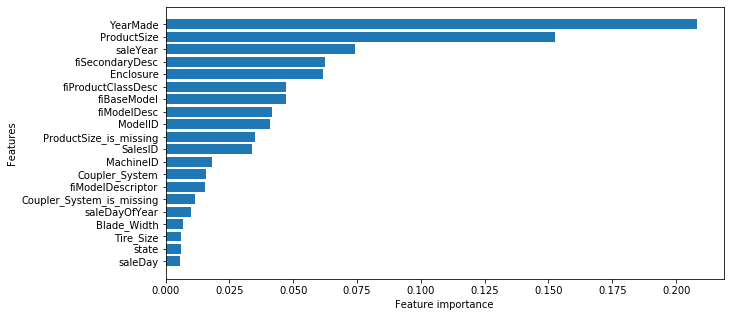

In [113]:
plot_feature_imp(X_train.columns,final_model.feature_importances_)